In [1]:
import warnings
import numpy as np

import astropy.units as u

%load_ext autoreload
%autoreload 2

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import poppy
    import matplotlib
    matplotlib.use('nbagg')
    #from matplotlib import style
    #style.use('ggplot')
    import matplotlib.pyplot as plt

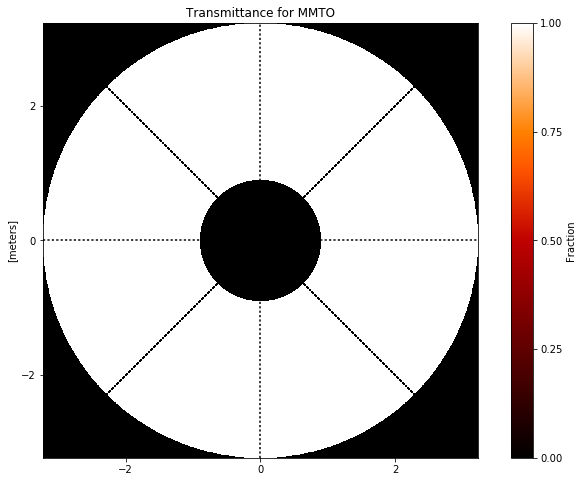

In [2]:
osys = poppy.OpticalSystem()
primary = poppy.CircularAperture(radius=3.2285 * u.m)
secondary = poppy.SecondaryObscuration(secondary_radius=0.9, n_supports=4, support_width=0.02, support_angle_offset=45.)
mmt = poppy.CompoundAnalyticOptic(opticslist=[primary, secondary], name="MMTO")
plt.figure(figsize=(12,8))
mmt.display(npix=1024, colorbar_orientation='vertical')

plt.show()

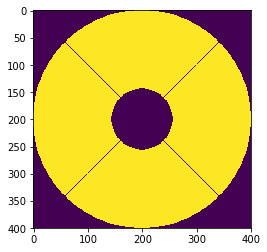

In [3]:
im = mmt.to_fits(npix=400)[0].data
plt.imshow(im)
plt.show()

In [4]:
a = 15 * u.mm
a.to(u.m)

<Quantity 0.015 m>

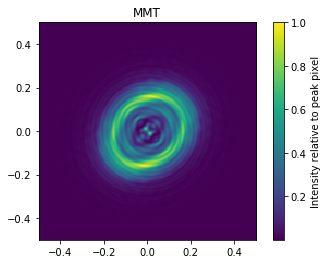

In [5]:
osys = poppy.OpticalSystem()
coeffs = [0, 0, 0, 550e-9, 90e-9, -1e-9 , 1e-9, 1e-9, -1e-9, 5e-9, 0.0, 5e-9]
osys.add_pupil(mmt)
wfe = poppy.ZernikeWFE(radius=3.2285, coefficients=coeffs)
osys.add_pupil(wfe)
osys.add_detector(pixelscale=0.01, fov_arcsec=1.0)

psf = osys.calc_psf(5.5e-7)
poppy.display_psf(psf, scale='linear', title="MMT", normalize='peak', vmin=1.0e-5, vmax=1.0, cmap='viridis')
plt.show()

In [6]:
psf[0].data.sum()

0.98389062734879895

In [7]:
from mmtwfs.telescope import MMT
from mmtwfs.zernike import ZernikeVector

In [8]:
t = MMT()

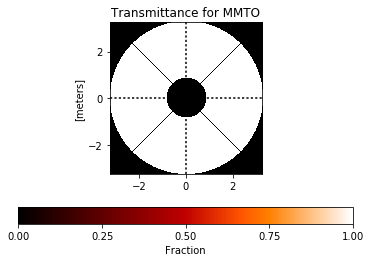

In [9]:
t.pupil.display(npix=1024)
plt.show()

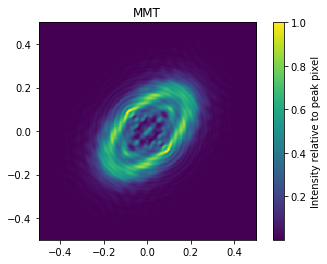

In [10]:
z = ZernikeVector(Z04=1000*u.nm, Z05=0.5*u.um)

psf = t.psf(z)
poppy.display_psf(psf, scale='linear', title="MMT", normalize='peak', vmin=1.0e-5, vmax=1.0, cmap='viridis')
plt.show()